In [77]:
%load_ext autoreload
%autoreload 2
from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ユークリッド距離によるスコア

In [35]:
import recommendations as rec
rec.sim_distance(rec.critics, 'Lisa Rose', 'Gene Seymour')

0.29429805508554946

# pandas.DataFrameからのplot

In [4]:
intersection = set(rec.critics['Lisa Rose'].keys()) & set(rec.critics['Gene Seymour'].keys())
import pandas as pd
df = pd.DataFrame({
        'Lisa Rose': {k: v for k, v in rec.critics['Lisa Rose'].items() if k in intersection},
        'Gene Seymour': {k: v for k, v in rec.critics['Gene Seymour'].items() if k in intersection}})

In [5]:
df

,Gene Seymour,Lisa Rose
Just My Luck,1.5,3.0
Lady in the Water,3.0,2.5
Snakes on a Plane,3.5,3.5
Superman Returns,5.0,3.5
The Night Listener,3.0,3.0
"You, Me and Dupree",3.5,2.5


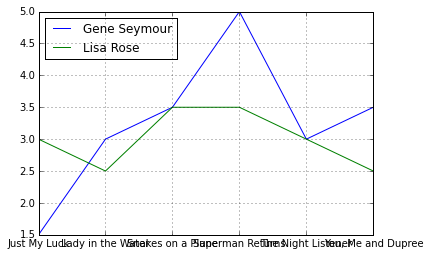

In [6]:
%matplotlib inline
df.plot()

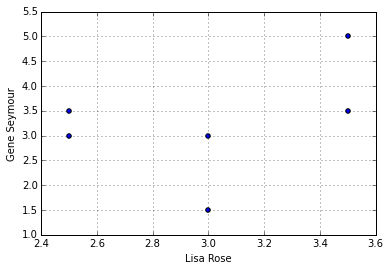

In [8]:
df.plot(kind='scatter', x='Lisa Rose', y='Gene Seymour')

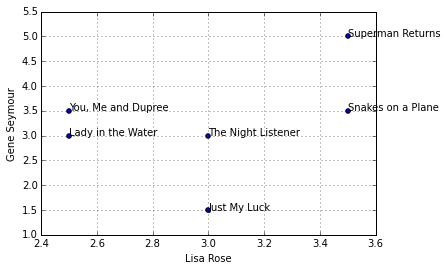

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.plot(kind='scatter', x='Lisa Rose', y='Gene Seymour', ax=ax)
for i, v in df.iterrows():
        ax.text(v['Lisa Rose'], v['Gene Seymour'], v.name)

## ピアソン相関に依るスコア

In [7]:
rec.sim_pearson(rec.critics, 'Lisa Rose', 'Gene Seymour')

0.39605901719066977

## 評者をランキングする

In [38]:
import imp
imp.reload(rec)
rec.top_matches(rec.critics, 'Toby', n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

## アイテムを推薦する

In [40]:
rec.get_recommendations(rec.critics, 'Toby')

[(3.3477895267131013, 'The Night Listener'),
 (2.832549918264162, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

In [41]:
rec.get_recommendations(rec.critics, 'Toby', similarity=rec.sim_distance)

[(3.457128694491423, 'The Night Listener'),
 (2.778584003814924, 'Lady in the Water'),
 (2.422482042361917, 'Just My Luck')]

In [43]:
rec.critics.keys()

dict_keys(['Toby', 'Claudia Puig', 'Mick LaSalle', 'Gene Seymour', 'Michael Phillips', 'Jack Matthews', 'Lisa Rose'])

### 筆者のための推薦の作成

文中の私 -> 著者 -> Toby Segaran -> Toby

In [117]:
author = 'Toby'
rec.top_matches(rec.critics, author)
critics_other = {k: v for k, v in rec.critics.items() if k not in (author, 'Michael Phillips')}
titles = ['The Night Listener', 'Lady in the Water', 'Just My Luck']

df = pd.DataFrame({
        'sim': {critic: sim for sim, critic in rec.top_matches(rec.critics, author)},
})
for title in titles:
    df[title] = pd.Series({k: v[title] for k, v in critics_other.items() if title in v})
    df['S.' + title] = df[title] * df['sim']

s = df.sum()
df = df.append(pd.DataFrame({'sum': s}).T)
df
# sim. sum (NaN以外のsimのsum)

,sim,The Night Listener,S.The Night Listener,Lady in the Water,S.Lady in the Water,Just My Luck,S.Just My Luck
Claudia Puig,0.893405,4.5,4.020323,NaN,NaN,3.0,2.680215
Gene Seymour,0.381246,3.0,1.143739,3.0,1.143739,1.5,0.571870
Jack Matthews,0.662849,3.0,1.988547,3.0,1.988547,NaN,NaN
Lisa Rose,0.991241,3.0,2.973722,2.5,2.478102,3.0,2.973722
Mick LaSalle,0.924473,3.0,2.773420,3.0,2.773420,2.0,1.848947
sum,3.853215,16.5,12.899752,11.5,8.383808,9.5,8.074754


## 似ている製品

In [119]:
movies = rec.transform_prefs(rec.critics)
rec.top_matches(movies, 'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

In [120]:
rec.get_recommendations(movies, 'Just My Luck')

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

### 相関のグラフ

In [132]:
df_moveis = pd.DataFrame({
        'Just My Luck': movies['Just My Luck'],
        'Superman Returns': movies['Superman Returns'],
})
df_moveis

,Just My Luck,Superman Returns
Claudia Puig,3.0,4.0
Gene Seymour,1.5,5.0
Jack Matthews,NaN,5.0
Lisa Rose,3.0,3.5
Michael Phillips,NaN,3.5
Mick LaSalle,2.0,3.0
Toby,NaN,4.0


(-0.48148148148148145,
 5.0185185185185182,
 -0.42289003161103106,
 0.577109968388969,
 0.72954502235526697)


,Just My Luck,Superman Returns
Claudia Puig,3.0,4.0
Gene Seymour,1.5,5.0
Lisa Rose,3.0,3.5
Mick LaSalle,2.0,3.0


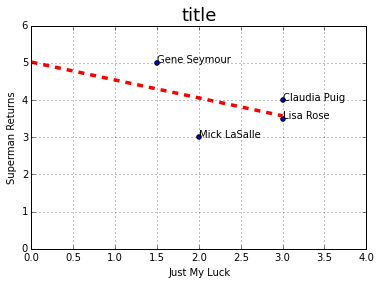

In [193]:
df_moveis = df_moveis[df_moveis['Just My Luck'].notnull()]
x = df_moveis['Just My Luck']
y = df_moveis['Superman Returns']
# n * m, index:N
fig, ax = plt.subplots()
ax.set_xlim(0, x.max() + 1)
ax.set_ylim(0, y.max() + 1)
for i, v in df_moveis.iterrows():
        ax.text(v['Just My Luck'], v['Superman Returns'], v.name)
#plt.scatter(x=x, y=y)
ax.set_title('title', size=18)

# add line
from matplotlib import lines
from scipy.stats import linregress
slope, intercept, r_value, p_pavlue, stderr = linregress(x,y)
pprint((slope, intercept, r_value, p_pavlue, stderr,))

y_pos = lambda x: x * slope + intercept
line = lines.Line2D([0, x.max()], [y_pos(0), y_pos(x.max())], color='r', linestyle='--', linewidth=3.5)
ax.add_line(line)

df_moveis.plot(kind='scatter', x='Just My Luck', y='Superman Returns', ax=ax)
df_moveis

### result of linregress
- slope : float, slope of the regression line
- intercept : float, intercept of the regression line
- r-value : float, correlation coefficient
- p-value : float, two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero
- stderr : float, Standard error of the estimate